In [23]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
metadata = pd.read_csv('metadata.csv')

In [31]:
lst_rgb_hist = []
for cover_id in metadata['cover_id']:
    path = "image/"+str(cover_id)+".jpg"
    image = cv2.imread(path)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    norm_hist = cv2.normalize(hist, None)
    lst_rgb_hist.append(norm_hist)

In [48]:
lst_img_corr = []
for i in range(len(lst_rgb_hist)):
    i_hist = lst_rgb_hist[i]
    lst_corr = []
    for j in range(len(lst_rgb_hist)):
        j_hist = lst_rgb_hist[j]
        corr = cv2.compareHist(i_hist, j_hist, cv2.HISTCMP_CORREL)
        lst_corr.append(corr)
    lst_img_corr.append(lst_corr)

In [61]:
lst_max_corr_idx = []
for i in range(len(lst_img_corr)):
    lst_corr = lst_img_corr[i]
    max_corr = 0
    max_corr_idx = 0
    for j in range(len(lst_corr)):
        corr = lst_corr[j]
        if corr == 1:
            continue
        else:
            if corr > max_corr:
                max_corr = corr
                max_corr_idx = j
    lst_max_corr_idx.append(max_corr_idx)

In [70]:
lst_max_corr_cover_id = []
for idx in lst_max_corr_idx:
    sim_cover_id = metadata['cover_id'].iloc[idx]
    lst_max_corr_cover_id.append(sim_cover_id)

In [67]:
metadata['Most Similar Book'] = pd.Series(lst_max_corr_cover_id)

In [72]:
metadata[metadata['cover_id']==39131]

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy,Most Similar Book
179,851,39131,Pretty Little Liars,Sara Shepard,NaN,Romance,"['nyt:series_books=2010-11-13', 'Juvenile Fict...",163000,0.935862,0.185962,0.845951,450332.283594,5010523


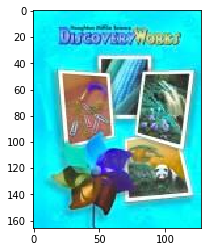

In [76]:
img = cv2.imread("image/5010523.jpg")
plt.imshow(img)


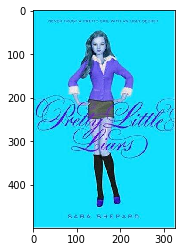

In [77]:
img = cv2.imread("image/39131.jpg")
plt.imshow(img)


In [73]:
metadata

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy,Most Similar Book
0,257,5010523,DiscoveryWorks,William Badders,NaN,Science,"['Science', 'Study and teaching']",21248,0.801393,0.270078,0.682315,1.231024e+05,39131
1,328,7225312,Chemicals of Life,Isaac Asimov,NaN,Science,"['organic chemistry', 'Biology', 'Biochemistry...",139000,0.303683,0.189660,0.716836,6.199158e+05,789348
2,375,28269,The Curious Life of Robert Hooke,Lisa Jardine,NaN,Science,"['History', 'Science', 'Accessible book', 'Pro...",150575,0.321481,0.134043,0.225062,5.733825e+05,745394
3,96,310408,"One, two, three ... infinity",George Gamow,NaN,Science,"['Science', 'Accessible book', 'physics', 'Pro...",141550,0.468131,0.503024,0.735062,5.143849e+05,33059
4,136,1173785,How to Write and Publish a Scientific Paper,Robert A. Day,NaN,Science,"['Wetenschappelijke publicaties', 'Protected D...",151500,0.417190,0.456612,0.576622,6.799990e+05,4323189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2134,1979130,Morning Star,H. Rider Haggard,NaN,Fantasy,"['Fantasy', 'Accessible book', 'Science Fictio...",150100,0.384787,0.272719,0.560487,8.927842e+05,6404518
246,2398,1818336,Dragons of the Highlord Skies,Margaret Weis,NaN,Fantasy,"['Fantasy', 'Fiction']",151500,0.449218,0.577509,0.437902,8.460157e+05,5403105
247,2076,5548056,The Crock of Gold,James Stephens,NaN,Fantasy,"['Accessible book', 'Fairies', 'Fiction', 'Fan...",217500,0.490452,0.272607,0.211785,1.376412e+06,1406945
248,2020,8441376,"The Lion, the Witch and the Wardrobe",C. S. Lewis,NaN,Fantasy,"['English Fantasy fiction', 'juvenile works', ...",147000,0.600983,0.326748,0.389517,7.664555e+05,6599374


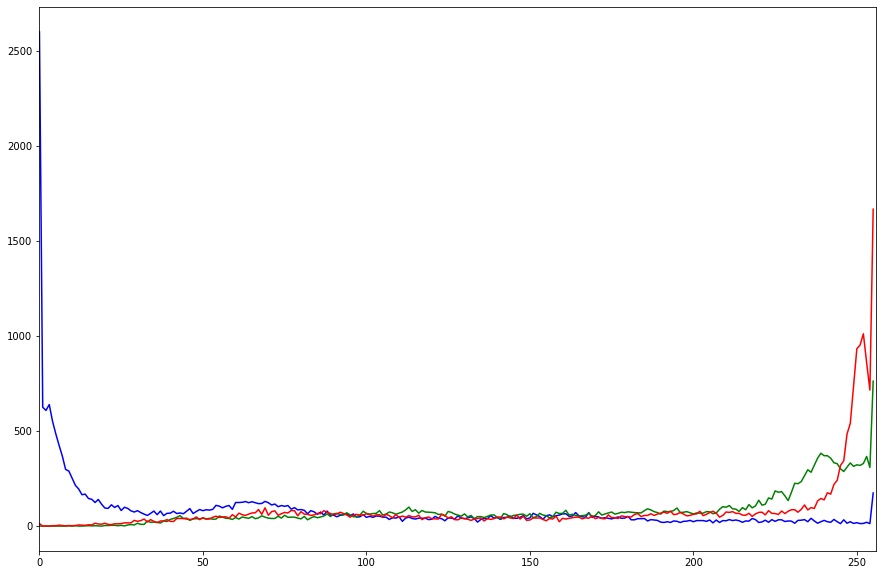

In [39]:
img_path = "image/5010523.jpg"
img = cv2.imread(img_path)
color = ('b','g','r')
plt.figure(figsize=(15,10))
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [38]:
metadata

,Unnamed: 0,cover_id,title,author,year,genre,genre_alts,pixel_count,mean_brightness,mean_hue,mean_saturation,entropy
0,257,5010523,DiscoveryWorks,William Badders,NaN,Science,"['Science', 'Study and teaching']",21248,0.801393,0.270078,0.682315,1.231024e+05
1,328,7225312,Chemicals of Life,Isaac Asimov,NaN,Science,"['organic chemistry', 'Biology', 'Biochemistry...",139000,0.303683,0.189660,0.716836,6.199158e+05
2,375,28269,The Curious Life of Robert Hooke,Lisa Jardine,NaN,Science,"['History', 'Science', 'Accessible book', 'Pro...",150575,0.321481,0.134043,0.225062,5.733825e+05
3,96,310408,"One, two, three ... infinity",George Gamow,NaN,Science,"['Science', 'Accessible book', 'physics', 'Pro...",141550,0.468131,0.503024,0.735062,5.143849e+05
4,136,1173785,How to Write and Publish a Scientific Paper,Robert A. Day,NaN,Science,"['Wetenschappelijke publicaties', 'Protected D...",151500,0.417190,0.456612,0.576622,6.799990e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
245,2134,1979130,Morning Star,H. Rider Haggard,NaN,Fantasy,"['Fantasy', 'Accessible book', 'Science Fictio...",150100,0.384787,0.272719,0.560487,8.927842e+05
246,2398,1818336,Dragons of the Highlord Skies,Margaret Weis,NaN,Fantasy,"['Fantasy', 'Fiction']",151500,0.449218,0.577509,0.437902,8.460157e+05
247,2076,5548056,The Crock of Gold,James Stephens,NaN,Fantasy,"['Accessible book', 'Fairies', 'Fiction', 'Fan...",217500,0.490452,0.272607,0.211785,1.376412e+06
248,2020,8441376,"The Lion, the Witch and the Wardrobe",C. S. Lewis,NaN,Fantasy,"['English Fantasy fiction', 'juvenile works', ...",147000,0.600983,0.326748,0.389517,7.664555e+05
